# Loteca

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Ler arquivo

In [23]:
df = pd.read_csv("arquivos/england-championship-matches-2018-to-2019-stats.csv", na_values=['nan'])

In [24]:
df = df.dropna()

In [259]:
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,...,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,Res,Result
0,1533322800,Aug 3 2018 - 7:00pm,complete,16923.0,Reading,Derby County,0.0,0.0,1.13,1.38,...,2.93,1.29,1.95,3.40,6.05,1.87,1.83,Madejski Stadium (Reading- Berkshire),A,H
1,1533391200,Aug 4 2018 - 2:00pm,complete,22677.0,Birmingham City,Norwich City,0.0,0.0,1.75,1.88,...,3.14,1.35,2.15,3.85,6.95,2.00,1.74,St. Andrew's Stadium (Birmingham),D,H
2,1533391200,Aug 4 2018 - 2:00pm,complete,10297.0,Brentford,Rotherham United,0.0,0.0,2.13,0.25,...,6.73,1.15,1.56,2.40,4.10,1.74,1.95,Griffin Park (Brentford- Middlesex),H,H
3,1533391200,Aug 4 2018 - 2:00pm,complete,22395.0,Bristol City,Nottingham Forest,0.0,0.0,1.38,1.38,...,3.05,1.26,1.87,3.20,5.75,1.80,1.91,Ashton Gate Stadium (Bristol),D,H
4,1533391200,Aug 4 2018 - 2:00pm,complete,18940.0,Ipswich Town,Blackburn Rovers,0.0,0.0,0.75,1.50,...,3.09,1.34,2.10,3.75,6.70,1.95,1.77,Portman Road Stadium (Ipswich- Suffolk),D,H


In [132]:
for i, r in df.iterrows():
    if r['home_team_goal_count'] > r['away_team_goal_count']:
        df['Res'][i] = 'H'
    else:
        if r['home_team_goal_count'] < r['away_team_goal_count']:
            df['Res'][i] = 'A'
        else:
            if r['home_team_goal_count'] == r['away_team_goal_count']:
                df['Res'][i] = 'D'
                        

C:\ProgramData\Miniconda3\envs\loteca\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Miniconda3\envs\loteca\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Miniconda3\envs\loteca\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

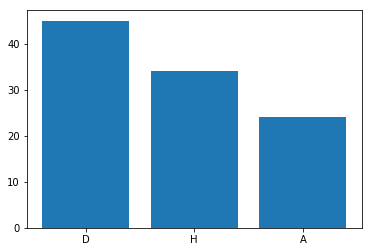

In [133]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

In [135]:
df[df['Res']=='H'].groupby(['home_team_name'])['home_team_name'].count().sort_values(ascending=False)

home_team_name
Sheffield United        4
West Bromwich Albion    4
Derby County            3
Birmingham City         3
Millwall                3
Wigan Athletic          2
Sheffield Wednesday     2
Reading                 2
Brentford               2
Blackburn Rovers        1
Bristol City            1
Norwich City            1
Leeds United            1
Nottingham Forest       1
Preston North End       1
Rotherham United        1
Swansea City            1
Aston Villa             1
Name: home_team_name, dtype: int64

### Nomes dos times

In [142]:
vocab = []

In [196]:
vocab = df['home_team_name'].unique().tolist(), df['away_team_name'].unique().tolist()

In [198]:
vocab = np.array(vocab).reshape(np.array(vocab).shape[1]*2)

In [203]:
vocab = np.unique(vocab)

### Transformar em índices

In [204]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [206]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [207]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    vec = [word2vector(H), word2vector(A)]
    return np.array(vec).reshape(np.array(vec).shape[1]*2)

### Função para indexar os jogos

In [208]:
def text_to_vector2(text): 
    return word2idx.get(text, None)


### Indexar os resultados

In [209]:
X = []
y = []

for _, row in df.iterrows():
    X.append(prepare(row['home_team_name'], row['away_team_name']))    
    n = -row['home_team_goal_count'] + row['away_team_goal_count']
    
    if np.isnan(n):
        n = 0
    
    y.append(n)
    
# X = np.array(X).reshape(np.array(X).shape[0],np.array(X).shape[2]*2)

In [211]:
np.array(X).shape

(103, 48)

### Separar os datasets de treinamento e teste

### Suport vector machine

In [242]:
from sklearn.svm import SVC
# model = SVC(gamma='scale', C=5.0, epsilon=0.2)
model = SVC(gamma='scale', C=5.0)

### Random forest

In [17]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

### Treinar o modelo

In [276]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

X_train, X_test, y_train, y_test = X[:int(-len(X)/3)], X[int(len(X)-len(X)/3):],y[:int(-len(y)/3)], y[int(len(X)-len(y)/3):]

In [277]:
model.fit(X_train, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Avaliar precisão

In [278]:
res = []
for j in range(len(X_test)):
    r = model.predict([X_test[j]])
#     res.append(round(r[0],0) - y_test[j])
    res.append(r[0] - y_test[j])
print(round((1 - abs(np.mean(res))) * 100,0), '%')

43.0 %


### Loop para atingir maxima precisão

In [268]:
while True:
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

    X_train, X_test, y_train, y_test = X[:int(-len(X)/3)], X[int(len(X)-len(X)/3):],y[:int(-len(y)/3)], y[int(len(X)-len(y)/3):]
    
    model.fit(X_train, y_train)
    
    res = []
    for j in range(len(X_test)):
        r = model.predict([X_test[j]])
        res.append(round(r[0],0) - y_test[j])
    p = round((1 - abs(np.mean(res))) * 100,0)
    
    
    if p >= 50:
        break
        
print(round((1 - abs(np.mean(res))) * 100,0), '%')

KeyboardInterrupt: 

### Salvar o modelo

In [229]:
from sklearn.externals import joblib

In [230]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [23]:
model = joblib.load('model.joblib') 

### Lista de times

In [231]:
from flask import jsonify

In [232]:
d = {}

In [233]:
d['teams'] = vocab.tolist()

In [234]:
import json


In [235]:
json.dumps(d)

'{"teams": ["Aston Villa", "Birmingham City", "Blackburn Rovers", "Bolton Wanderers", "Brentford", "Bristol City", "Derby County", "Hull City", "Ipswich Town", "Leeds United", "Middlesbrough", "Millwall", "Norwich City", "Nottingham Forest", "Preston North End", "Queens Park Rangers", "Reading", "Rotherham United", "Sheffield United", "Sheffield Wednesday", "Stoke City", "Swansea City", "West Bromwich Albion", "Wigan Athletic"]}'

In [236]:
vocab

array(['Aston Villa', 'Birmingham City', 'Blackburn Rovers',
       'Bolton Wanderers', 'Brentford', 'Bristol City', 'Derby County',
       'Hull City', 'Ipswich Town', 'Leeds United', 'Middlesbrough',
       'Millwall', 'Norwich City', 'Nottingham Forest',
       'Preston North End', 'Queens Park Rangers', 'Reading',
       'Rotherham United', 'Sheffield United', 'Sheffield Wednesday',
       'Stoke City', 'Swansea City', 'West Bromwich Albion',
       'Wigan Athletic'], dtype='<U20')

### Realizar previsão

In [275]:
H = 'Millwall'
A = 'Reading'

p = model.predict([prepare(H,A)])

if p < 0:
    print(H, 'Vence com ', round(abs(p[0]),3),' gol de diferença')
else:
    if p > 0:
        print(A, 'Vence com', round(abs(p[0]),3),' gol de diferença')
    else:
        if p == 0:
            print('Empate')


Empate


In [238]:
p

array([-0.22419816])